# 第 4 章 网络的描述统计

## 导入库

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns

from modules.tools import graph_info

sns.set_theme(font='SimHei')

## 网络密度

In [2]:
# 读取边数据
edge_largest = pd.read_csv('../../Data/edge_largest.csv')
edge_largest = nx.from_pandas_edgelist(edge_largest, source='source', target='target')
graph_info(edge_largest)

Graph with 4925 nodes and 10191 edges.
Graph type:      undirected unweighted 
Node attributes: 
Edge attributes: 
Edge list:
[ 0] A10014-0       -- A11813-0      	[ 1] A10014-0       -- A18443-0      
[ 2] A10014-0       -- A25933        	[ 3] A10014-0       -- A26500-1      
[ 4] A10014-0       -- A27463-58     	[ 5] A10014-0       -- A27664-0      
[ 6] A10014-0       -- A29195-1      	[ 7] A10014-0       -- A37213-0      
[ 8] A10014-0       -- A40785-0      	[ 9] A10014-0       -- A41093-0      
[10] A10014-0       -- A41419-0      	[11] A10014-0       -- A49668-2      
...


In [3]:
# 网络密度
nx.density(edge_largest)

0.0008404705843542661

## 度分布直方图

In [4]:
# 导入数据
karate = nx.read_graphml('../../Data/karate.graphml')
graph_info(karate)

Zachary's karate club network with 34 nodes and 78 edges.
Graph type:      undirected weighted 
Node attributes: Faction name label color 
Edge attributes: weight 
Edge list:
[ 0] Mr Hi    -- Actor 2 	[ 1] Mr Hi    -- Actor 3 	[ 2] Mr Hi    -- Actor 4 
[ 3] Mr Hi    -- Actor 5 	[ 4] Mr Hi    -- Actor 6 	[ 5] Mr Hi    -- Actor 7 
[ 6] Mr Hi    -- Actor 8 	[ 7] Mr Hi    -- Actor 9 	[ 8] Mr Hi    -- Actor 11
[ 9] Mr Hi    -- Actor 12	[10] Mr Hi    -- Actor 13	[11] Mr Hi    -- Actor 14
[12] Mr Hi    -- Actor 18	[13] Mr Hi    -- Actor 20	[14] Mr Hi    -- Actor 22
[15] Mr Hi    -- Actor 32	[16] Actor 2  -- Actor 3 	[17] Actor 2  -- Actor 4 
...


In [5]:
# 网络密度
nx.density(karate)

0.13903743315508021

In [6]:
# 节点的度
d = pd.DataFrame(karate.degree(), columns=['node', 'degree'])
# 度的最小值和最大值
# min(d.values()), max(d.values())
print(f"度最小的节点是{d['node'][d['degree'].idxmin()]}，度为{d['degree'].min()}")
print(f"度最大的节点是{d['node'][d['degree'].idxmax()]}，度为{d['degree'].max()}")

度最小的节点是n11，度为1
度最大的节点是n33，度为17


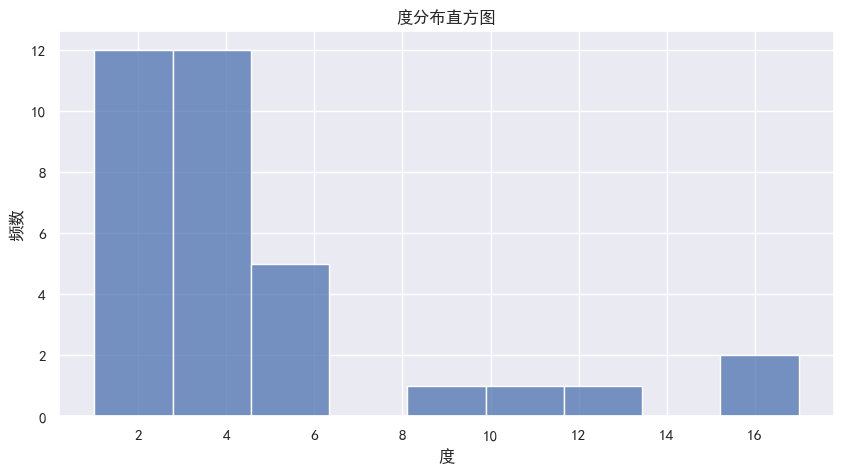

In [7]:
# 绘制度分布直方图
plt.figure(figsize=(10, 5))
sns.histplot(d['degree'])
plt.xlabel('度')
plt.ylabel('频数')
plt.title('度分布直方图')
plt.show()

## 双对数度分布图

In [8]:
# 读取边数据
edge_core = pd.read_csv('../../Data/edge_core.csv')
# 由边数据构造无向网络
edge_core = nx.from_pandas_edgelist(edge_core, source='node1', target='node2')
graph_info(edge_core)

Graph with 1061 nodes and 3310 edges.
Graph type:      undirected unweighted 
Node attributes: 
Edge attributes: 
Edge list:
[ 0] A10014-0       -- A11813-0      	[ 1] A10014-0       -- A18443-0      
[ 2] A10014-0       -- A27664-0      	[ 3] A10014-0       -- A41419-0      
[ 4] A10014-0       -- A51360-6      	[ 5] A10014-0       -- A6487-1       
[ 6] A10014-0       -- A9661-1       	[ 7] A11813-0       -- A18987-0      
[ 8] A11813-0       -- A35449-0      	[ 9] A11813-0       -- A9399-0       
[10] A18443-0       -- A27664-0      	[11] A18443-0       -- A39739-0      
...


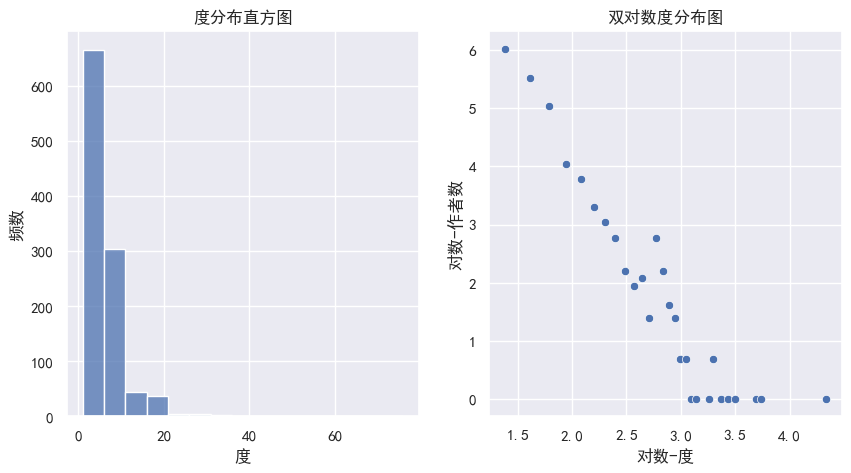

In [9]:
# 设置画布
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# 绘制度分布直方图
d = pd.DataFrame(edge_core.degree(), columns=['node', 'degree'])
sns.histplot(d['degree'], bins=range(1, 80, 5), ax=ax[0])
ax[0].set_xlabel('度')
ax[0].set_ylabel('频数')
ax[0].set_title('度分布直方图')

# 绘制双对数度分布图
freq = d.groupby('degree').size().reset_index(name='count')
freq['log_count'] = np.log(freq['count'])
freq['log_degree'] = np.log(freq['degree'])
sns.scatterplot(data=freq, x='log_degree', y='log_count', ax=ax[1])
ax[1].set_xlabel('对数-度')
ax[1].set_ylabel('对数-作者数')
ax[1].set_title('双对数度分布图')

plt.show()

## 二元结构

In [10]:
# 导入数据
UKfaculty = nx.read_graphml('../../Data/UKfaculty.graphml')
graph_info(UKfaculty)

Graph with 81 nodes and 817 edges.
Graph type:      directed weighted 
Node attributes: Group 
Edge attributes: weight 
Edge list:
[ 0] n0  -> n61	[ 1] n0  -> n44	[ 2] n0  -> n35	[ 3] n0  -> n60	[ 4] n0  -> n3 
[ 5] n0  -> n43	[ 6] n1  -> n28	[ 7] n1  -> n51	[ 8] n1  -> n40	[ 9] n1  -> n31
[10] n1  -> n34	[11] n1  -> n78	[12] n1  -> n20	[13] n1  -> n14	[14] n1  -> n24
[15] n1  -> n50	[16] n1  -> n17	[17] n1  -> n45	[18] n1  -> n38	[19] n1  -> n30
[20] n1  -> n42	[21] n1  -> n36	[22] n1  -> n79	[23] n2  -> n16	[24] n2  -> n52
[25] n2  -> n60	[26] n2  -> n58	[27] n3  -> n35	[28] n3  -> n2 	[29] n3  -> n60
...


`networkx` 库未提供直接计算二元结构数量的函数，这里分别采用循环遍历和矩阵运算两种方法计算二元结构数量。

In [11]:
# 通过循环遍历计算二元结构的数量
# 对称节点对、非对称节点对、空节点对
res = {'symmetric': 0, 'asymmetric': 0, 'null': 0}
visited = set() # 记录已经访问过的节点对，避免重复计算
for node1 in UKfaculty.nodes():
    for node2 in UKfaculty.nodes():
        if node1 == node2:
            continue
        if (node1, node2) in visited or (node2, node1) in visited:
            continue
        visited.add((node1, node2))
        visited.add((node2, node1))
        if UKfaculty.has_edge(node1, node2) and UKfaculty.has_edge(node2, node1):
            res['symmetric'] += 1
        elif UKfaculty.has_edge(node1, node2) or UKfaculty.has_edge(node2, node1):
            res['asymmetric'] += 1
        else:
            res['null'] += 1
print(f"对称节点对：{res['symmetric']}")
print(f"非对称节点对：{res['asymmetric']}")
print(f"空节点对：{res['null']}")

对称节点对：240
非对称节点对：337
空节点对：2663


In [12]:
# 通过矩阵运算计算二元结构的数量
# 对称节点对、非对称节点对、空节点对
A = nx.to_numpy_array(UKfaculty, weight=None)
res = {}
res['symmetric'] = np.sum(np.diag(A @ A)) / 2
res['asymmetric'] = np.sum(np.diag(A @ A.T)) - np.sum(np.diag(A @ A))
n = UKfaculty.number_of_nodes()
res['null'] = n * (n - 1) / 2 - np.sum(np.diag(A @ A.T)) + np.sum(np.diag(A @ A)) / 2
print(f"对称节点对：{res['symmetric']}")
print(f"非对称节点对：{res['asymmetric']}")
print(f"空节点对：{res['null']}")

对称节点对：240.0
非对称节点对：337.0
空节点对：2663.0


## 三角形

In [13]:
# 导入数据
kite = nx.krackhardt_kite_graph()
graph_info(kite)

Krackhardt Kite Social Network with 10 nodes and 18 edges.
Graph type:      undirected unweighted 
Node attributes: 
Edge attributes: 
Edge list:
[ 0] 0 -- 1	[ 1] 0 -- 2	[ 2] 0 -- 3	[ 3] 0 -- 5	[ 4] 1 -- 3	[ 5] 1 -- 4
[ 6] 1 -- 6	[ 7] 2 -- 3	[ 8] 2 -- 5	[ 9] 3 -- 4	[10] 3 -- 5	[11] 3 -- 6
[12] 4 -- 6	[13] 5 -- 6	[14] 5 -- 7	[15] 6 -- 7	[16] 7 -- 8	[17] 8 -- 9


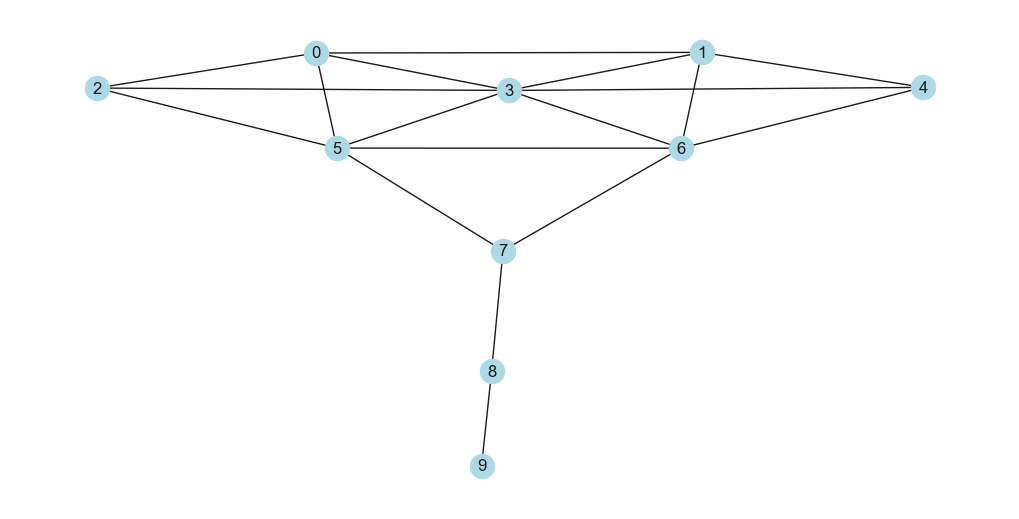

In [14]:
plt.figure(figsize=(10, 5))
pos = nx.spring_layout(kite, seed=42)
nx.draw(kite, pos, with_labels=True, node_color='lightblue')
plt.show()

In [15]:
# 通过循环给出所有的三角形结构，每一行为三角形的三个顶点
triangles = set()
for node1 in kite.nodes():
    for node2 in kite.neighbors(node1):
        for node3 in kite.neighbors(node2):
            if node3 in kite.neighbors(node1):
                triangles.add(tuple(sorted([node1, node2, node3])))
triangles

{(0, 1, 3),
 (0, 2, 3),
 (0, 2, 5),
 (0, 3, 5),
 (1, 3, 4),
 (1, 3, 6),
 (1, 4, 6),
 (2, 3, 5),
 (3, 4, 6),
 (3, 5, 6),
 (5, 6, 7)}

In [16]:
# 每个节点是多少个三角形结构的顶点
nx.triangles(kite)

{0: 4, 1: 4, 2: 3, 3: 8, 4: 3, 5: 5, 6: 5, 7: 1, 8: 0, 9: 0}

In [17]:
# 随机生成一个有向网络 15个节点，45条边
g_random = nx.gnm_random_graph(15, 45, seed=42, directed=True)
graph_info(g_random)

Graph with 15 nodes and 45 edges.
Graph type:      directed unweighted 
Node attributes: 
Edge attributes: 
Edge list:
[ 0] 0  -> 11	[ 1] 0  -> 1 	[ 2] 0  -> 8 	[ 3] 0  -> 12	[ 4] 0  -> 10
[ 5] 1  -> 9 	[ 6] 1  -> 14	[ 7] 2  -> 3 	[ 8] 2  -> 5 	[ 9] 3  -> 2 
[10] 3  -> 11	[11] 3  -> 7 	[12] 3  -> 12	[13] 4  -> 3 	[14] 4  -> 12
[15] 4  -> 1 	[16] 5  -> 4 	[17] 5  -> 13	[18] 5  -> 9 	[19] 5  -> 3 
[20] 6  -> 0 	[21] 6  -> 1 	[22] 6  -> 4 	[23] 7  -> 8 	[24] 7  -> 10
[25] 8  -> 9 	[26] 8  -> 6 	[27] 8  -> 4 	[28] 9  -> 4 	[29] 9  -> 14
...


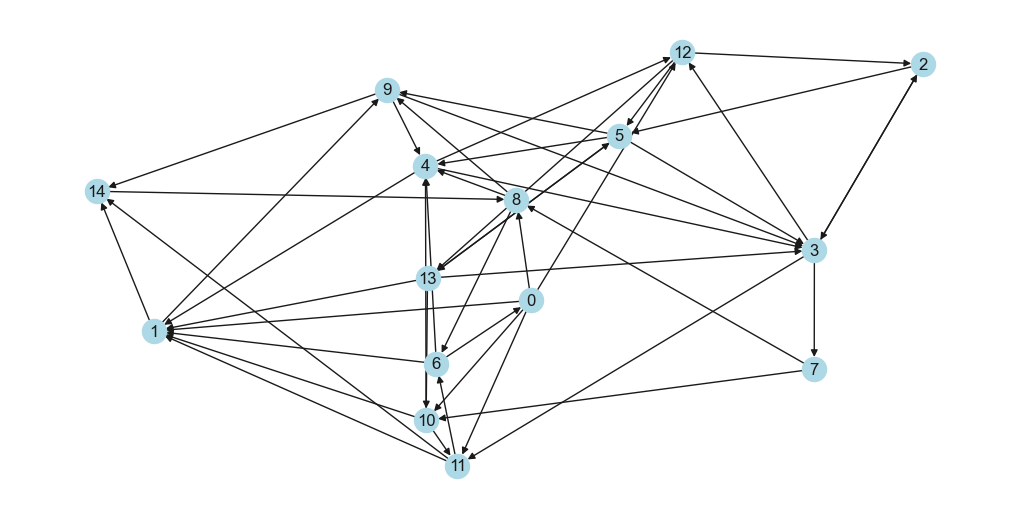

In [18]:
plt.figure(figsize=(10, 5))
pos = nx.spring_layout(g_random, seed=42)
nx.draw(g_random, pos, with_labels=True, node_color='lightblue')
plt.show()

In [19]:
# 网络当中的各种三元结构数量
nx.triadic_census(g_random)

{'003': 87,
 '012': 195,
 '102': 12,
 '021D': 22,
 '021U': 31,
 '021C': 68,
 '111D': 4,
 '111U': 6,
 '030T': 19,
 '030C': 7,
 '201': 0,
 '120D': 1,
 '120U': 1,
 '120C': 2,
 '210': 0,
 '300': 0}

`networkx` 库中对有向网络中三元结构的定义，与原书中的定义不同，具体如下。

参考：

[1] Vladimir Batagelj and Andrej Mrvar, A subquadratic triad census algorithm for large sparse networks with small maximum degree, University of Ljubljana, http://vlado.fmf.uni-lj.si/pub/networks/doc/triads/triads.pdf

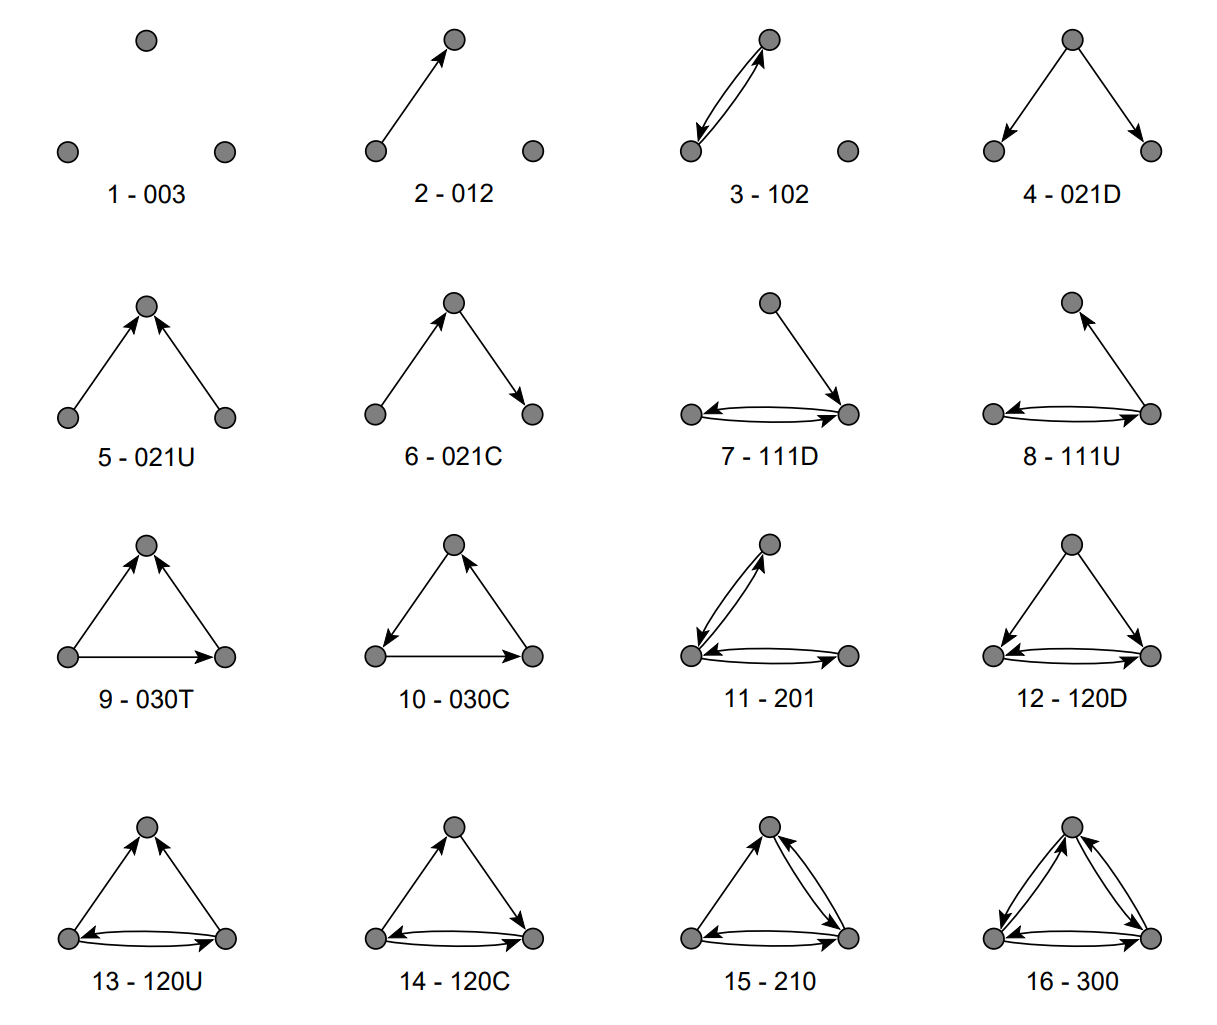

## 星形图、环形图、线图

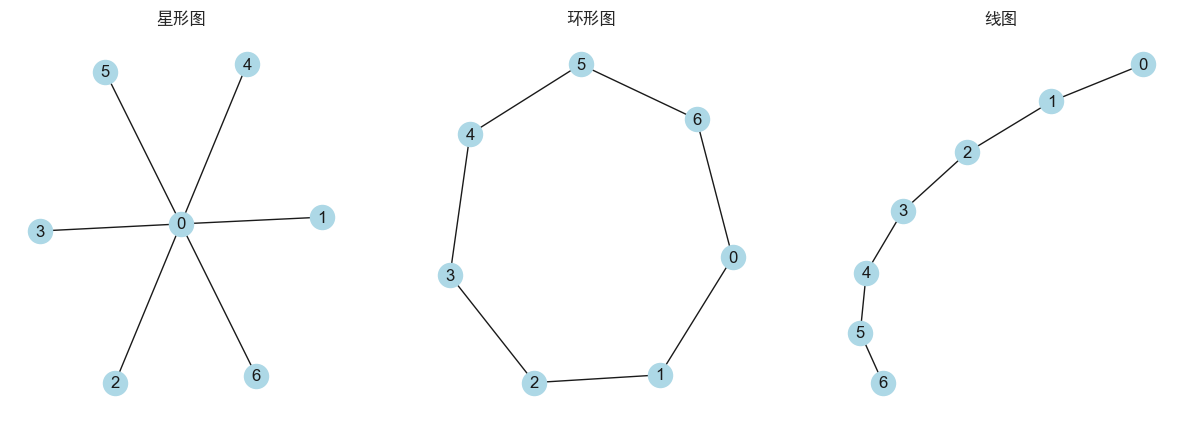

In [20]:
# 设置画布
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# 创建星形网络
g_1 = nx.star_graph(range(7))
pos_1 = nx.spring_layout(g_1, seed=42)
nx.draw(g_1, pos_1, with_labels=True, node_color='lightblue', ax=ax[0])
ax[0].set_title('星形图')

# 创建环形网络
g_2 = nx.cycle_graph(7)
pos_2 = nx.spring_layout(g_2, seed=42)
nx.draw(g_2, pos_2, with_labels=True, node_color='lightblue', ax=ax[1])
ax[1].set_title('环形图')

# 创建线形网络
g_3 = nx.path_graph(7)
pos_3 = nx.spring_layout(g_3, seed=42)
nx.draw(g_3, pos_3, with_labels=True, node_color='lightblue', ax=ax[2])
ax[2].set_title('线图')

plt.show()


## 星形图、环形图、线图的距离和直径

In [21]:
# 星形图的节点距离
list(nx.shortest_path_length(g_1))

[(0, {0: 0, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1}),
 (1, {1: 0, 0: 1, 2: 2, 3: 2, 4: 2, 5: 2, 6: 2}),
 (2, {2: 0, 0: 1, 1: 2, 3: 2, 4: 2, 5: 2, 6: 2}),
 (3, {3: 0, 0: 1, 1: 2, 2: 2, 4: 2, 5: 2, 6: 2}),
 (4, {4: 0, 0: 1, 1: 2, 2: 2, 3: 2, 5: 2, 6: 2}),
 (5, {5: 0, 0: 1, 1: 2, 2: 2, 3: 2, 4: 2, 6: 2}),
 (6, {6: 0, 0: 1, 1: 2, 2: 2, 3: 2, 4: 2, 5: 2})]

该结果返回一个迭代器（`源`、`字典`），其中`字典`的`值`表示从`源`到对应`键`的最短路径长度。

例如：(3, {3: 0, 0: 1, 1: 2, 2: 2, 4: 2, 5: 2, 6: 2})

表示：节点 3 到节点 3 的最短路径长度为 0，到节点 0 的最短路径长度为 1，以此类推。

In [22]:
# 星形图的网络直径
nx.diameter(g_1)

2

In [23]:
# 环形图的节点距离
list(nx.shortest_path_length(g_2))

[(0, {0: 0, 1: 1, 6: 1, 2: 2, 5: 2, 3: 3, 4: 3}),
 (1, {1: 0, 0: 1, 2: 1, 6: 2, 3: 2, 5: 3, 4: 3}),
 (2, {2: 0, 1: 1, 3: 1, 0: 2, 4: 2, 6: 3, 5: 3}),
 (3, {3: 0, 2: 1, 4: 1, 1: 2, 5: 2, 0: 3, 6: 3}),
 (4, {4: 0, 3: 1, 5: 1, 2: 2, 6: 2, 1: 3, 0: 3}),
 (5, {5: 0, 4: 1, 6: 1, 3: 2, 0: 2, 2: 3, 1: 3}),
 (6, {6: 0, 5: 1, 0: 1, 4: 2, 1: 2, 3: 3, 2: 3})]

In [24]:
# 环形图的网络直径
nx.diameter(g_2)

3

In [25]:
# 线图的节点距离
list(nx.shortest_path_length(g_3))

[(0, {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}),
 (1, {1: 0, 0: 1, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5}),
 (2, {2: 0, 1: 1, 3: 1, 0: 2, 4: 2, 5: 3, 6: 4}),
 (3, {3: 0, 2: 1, 4: 1, 1: 2, 5: 2, 0: 3, 6: 3}),
 (4, {4: 0, 3: 1, 5: 1, 2: 2, 6: 2, 1: 3, 0: 4}),
 (5, {5: 0, 4: 1, 6: 1, 3: 2, 2: 3, 1: 4, 0: 5}),
 (6, {6: 0, 5: 1, 4: 2, 3: 3, 2: 4, 1: 5, 0: 6})]

In [26]:
# 线图的网络直径
nx.diameter(g_3)

6

## 星形图、环形图、线图的度中心性

In [27]:
# 星形图的度中心性
nx.degree_centrality(g_1)

{0: 1.0,
 1: 0.16666666666666666,
 2: 0.16666666666666666,
 3: 0.16666666666666666,
 4: 0.16666666666666666,
 5: 0.16666666666666666,
 6: 0.16666666666666666}

In [28]:
# 环形图的度中心性
nx.degree_centrality(g_2) 

{0: 0.3333333333333333,
 1: 0.3333333333333333,
 2: 0.3333333333333333,
 3: 0.3333333333333333,
 4: 0.3333333333333333,
 5: 0.3333333333333333,
 6: 0.3333333333333333}

In [29]:
# 线图的度中心性
nx.degree_centrality(g_3)

{0: 0.16666666666666666,
 1: 0.3333333333333333,
 2: 0.3333333333333333,
 3: 0.3333333333333333,
 4: 0.3333333333333333,
 5: 0.3333333333333333,
 6: 0.16666666666666666}

## 星形图、环形图、线图的接近中心性

In [30]:
# 星形图的接近中心性
nx.closeness_centrality(g_1)

{0: 1.0,
 1: 0.5454545454545454,
 2: 0.5454545454545454,
 3: 0.5454545454545454,
 4: 0.5454545454545454,
 5: 0.5454545454545454,
 6: 0.5454545454545454}

In [31]:
# 环形图的接近中心性
nx.closeness_centrality(g_2)

{0: 0.5, 1: 0.5, 2: 0.5, 3: 0.5, 4: 0.5, 5: 0.5, 6: 0.5}

In [32]:
# 线图的接近中心性
nx.closeness_centrality(g_3)

{0: 0.2857142857142857,
 1: 0.375,
 2: 0.46153846153846156,
 3: 0.5,
 4: 0.46153846153846156,
 5: 0.375,
 6: 0.2857142857142857}

## 星形图、环形图、线图的中介中心性

In [33]:
# 星形图的中介中心性
nx.betweenness_centrality(g_1)

{0: 1.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0}

In [34]:
# 环形图的中介中心性
nx.betweenness_centrality(g_2)

{0: 0.2, 1: 0.2, 2: 0.2, 3: 0.2, 4: 0.2, 5: 0.2, 6: 0.2}

In [35]:
# 线图的中介中心性
nx.betweenness_centrality(g_3)

{0: 0.0,
 1: 0.3333333333333333,
 2: 0.5333333333333333,
 3: 0.6,
 4: 0.5333333333333333,
 5: 0.3333333333333333,
 6: 0.0}

## 星状结构

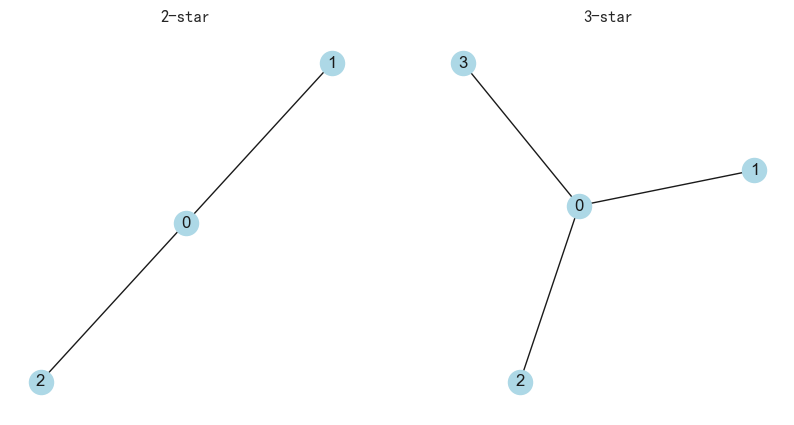

In [36]:
# 设置画布
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# 星状结构2-star
g_4 = nx.star_graph(2) # 等同于 nx.star_graph(range(3)) 因为range(3)=[0,1,2] 0是中心节点
# 绘图
pos = nx.spring_layout(g_4, seed=42)
nx.draw(g_4, pos, with_labels=True, node_color='lightblue', ax=ax[0])
ax[0].set_title('2-star')

# 星状结构3-star
g_5 = nx.star_graph(3)
# 绘图
pos = nx.spring_layout(g_5, seed=42)
nx.draw(g_5, pos, with_labels=True, node_color='lightblue', ax=ax[1])
ax[1].set_title('3-star')

plt.show()

`networkx` 库未提供直接计算星状结构数量的函数，这里采用循环遍历方法计算星状结构数量。

In [37]:
# 通过循环遍历计算星状结构的数量

# 2-star
def count_2star(g):
    n2star = 0
    # 计算出度大于1的节点，即中心节点
    c_nodes = [node for node, degree in g.degree() if degree > 1]
    # 遍历这些节点
    for c in c_nodes:
    # 计算与中心节点相连的节点数
        n = len(list(g.neighbors(c)))
    # 计算2-star的数量，基于排列组合的公式C(n, 2)
        n2star += n * (n - 1) / 2
    return n2star

# 3-star
def count_3star(g):
    n3star = 0
    # 计算出度大于2的节点，即中心节点
    c_nodes = [node for node, degree in g.degree() if degree > 2]
    # 遍历这些节点
    for c in c_nodes:
        # 计算与中心节点相连的节点数
        n = len(list(g.neighbors(c)))
        # 计算3-star的数量，基于排列组合的公式C(n, 3)
        n3star += n * (n - 1) * (n - 2) / 6
    return n3star

注：如果图中存在自环，则需要去除自环后再计算星状结构数量。

In [38]:
# 星状图的2-star和3-star的数量
print(f"2-star的数量：{count_2star(g_1)}")
print(f"3-star的数量：{count_3star(g_1)}")

2-star的数量：15.0
3-star的数量：20.0


In [39]:
# 环形图的2-star和3-star的数量
print(f"2-star的数量：{count_2star(g_2)}")
print(f"3-star的数量：{count_3star(g_2)}")

2-star的数量：7.0
3-star的数量：0


In [40]:
# 线图的2-star和3-star的数量
print(f"2-star的数量：{count_2star(g_3)}")
print(f"3-star的数量：{count_3star(g_3)}")

2-star的数量：5.0
3-star的数量：0


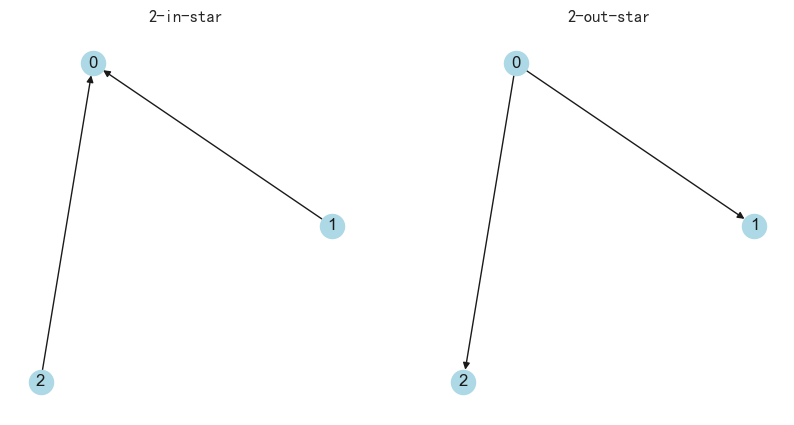

In [41]:
# 设置画布
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# 星状结构 2-in-star
g_4 = nx.empty_graph(3, create_using=nx.DiGraph)
g_4.add_edges_from([(1, 0), (2, 0)])

pos = nx.spring_layout(g_4, seed=42)

# 绘图
nx.draw(g_4, pos, with_labels=True, node_color='lightblue', ax=ax[0])
ax[0].set_title('2-in-star')

# 星状结构 2-out-star
g_5 = nx.empty_graph(3, create_using=nx.DiGraph)
g_5.add_edges_from([(0, 1), (0, 2)])

# 绘图
nx.draw(g_5, pos, with_labels=True, node_color='lightblue', ax=ax[1])
ax[1].set_title('2-out-star')

plt.show()

## 共同邻居

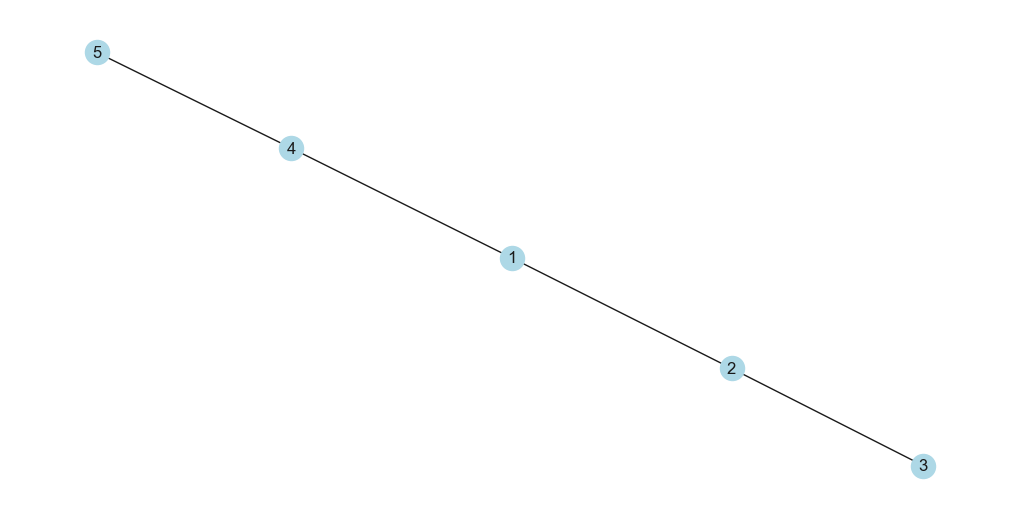

In [42]:
# 创建网络
g_6 = nx.Graph()
# 添加节点
g_6.add_nodes_from(range(1, 6))
# 添加连边
g_6.add_edges_from([(1, 2), (2, 3), (4, 5), (1, 4)])
# 绘图
plt.figure(figsize=(10, 5))
pos = nx.spring_layout(g_6, seed=42)
nx.draw(g_6, pos, with_labels=True, node_color='lightblue')
plt.show()

## 计算共同邻居

In [43]:
# 节点2的邻居
n2 = list(g_6.neighbors(2))
n2

[1, 3]

In [44]:
# 节点4的邻居的邻居
n4 = list(g_6.neighbors(4))
n4

[5, 1]

In [45]:
# 节点2与节点4的共同邻居
list(nx.common_neighbors(g_6, 2, 4))

[1]

## 案例：统计学科合作者网络

读入数据并构建网络

In [46]:
# 读入数据
data = pd.read_csv("../../Data/edge_largest.csv")
# 创建无向网络
g = nx.from_pandas_edgelist(data, source='source', target='target')
graph_info(g)    

Graph with 4925 nodes and 10191 edges.
Graph type:      undirected unweighted 
Node attributes: 
Edge attributes: 
Edge list:
[ 0] A10014-0       -- A11813-0      	[ 1] A10014-0       -- A18443-0      
[ 2] A10014-0       -- A25933        	[ 3] A10014-0       -- A26500-1      
[ 4] A10014-0       -- A27463-58     	[ 5] A10014-0       -- A27664-0      
[ 6] A10014-0       -- A29195-1      	[ 7] A10014-0       -- A37213-0      
[ 8] A10014-0       -- A40785-0      	[ 9] A10014-0       -- A41093-0      
[10] A10014-0       -- A41419-0      	[11] A10014-0       -- A49668-2      
...


In [47]:
# 计算网络的密度
nx.density(g)

0.0008404705843542661

绘制度分布直方图

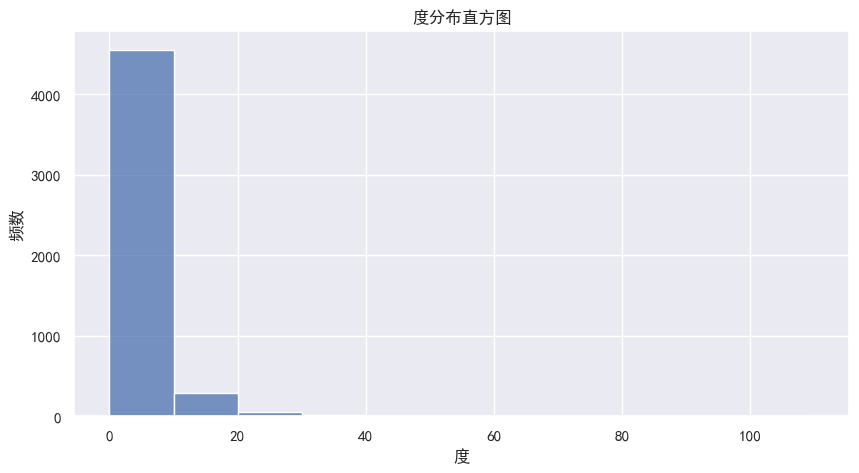

In [48]:
# 节点的度
d = pd.DataFrame(g.degree(), columns=['name', 'degree'])
# 绘制度分布直方图
plt.figure(figsize=(10, 5))
sns.histplot(d['degree'], bins=range(0, 120, 10))
plt.xlabel('度')
plt.ylabel('频数')
plt.title('度分布直方图')
plt.show()

绘制双对数度分布图

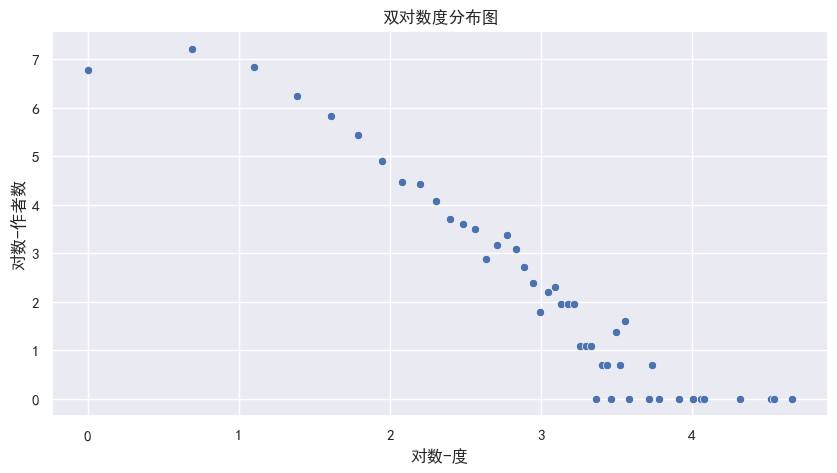

In [49]:
# 绘制双对数度分布图
# 计数
freq = d.groupby('degree').size().reset_index(name='count')
# 计算对数
freq['log_count'] = np.log(freq['count'])
freq['log_degree'] = np.log(freq['degree'])
# 绘图
plt.figure(figsize=(10, 5))
sns.scatterplot(data=freq, x='log_degree', y='log_count')
plt.xlabel('对数-度')
plt.ylabel('对数-作者数')
plt.title('双对数度分布图')
plt.show()

度

In [50]:
# 选择度前10的论文
degree_top10 = d.sort_values('degree', ascending=False).head(10)
degree_top10

,name,degree
84,A7232-0,106
65,A18422-0,94
269,A13633-1,92
75,A12402-0,75
410,A21046-0,59
463,A52163-1,58
869,A52370-0-2,55
45,A6744-1,50
333,A11171-0,44
607,A52373-0-0,42


In [51]:
# 读入重要的作者信息
author = pd.read_csv("../../Data/author.csv")
# 匹配排名前10的作者信息
degree_top10 = pd.merge(degree_top10, author, on='name')
degree_top10

,name,degree,author
0,A7232-0,106,"Carroll, Raymond J."
1,A18422-0,94,"Hall, Peter"
2,A13633-1,92,"Fan, Jianqing"
3,A12402-0,75,"Dunson, David B."
4,A21046-0,59,"Ibrahim, Joseph G."
5,A52163-1,58,"Zeng, Donglin"
6,A52370-0-2,55,"Zhu, Hongtu"
7,A6744-1,50,"Cai, T. Tony"
8,A11171-0,44,"Dette, Holger"
9,A52373-0-0,42,"Zhu, Lixing"


计算路径与最短距离

计算出节点（A7232-0）到节点（A18422-0）之间的所有最短路径

In [52]:
list(nx.all_shortest_paths(g, source='A7232-0', target='A18422-0'))

[['A7232-0', 'A18422-0']]

计算节点的中心性

In [53]:
# 计算节点的中介中心性并储存为数据框
betweenness = pd.DataFrame(nx.betweenness_centrality(g, normalized=True).items(), columns=['name', 'bet'])
# 降序排列
betweenness = betweenness.sort_values('bet', ascending=False)
# 读入重要的作者信息
author = pd.read_csv("../../Data/author.csv")                           
# 匹配作者信息
betweenness_top10 = pd.merge(betweenness.head(10), author, on='name')
betweenness_top10

,name,bet,author
0,A7232-0,0.202561,"Carroll, Raymond J."
1,A18422-0,0.181732,"Hall, Peter"
2,A13633-1,0.108685,"Fan, Jianqing"
3,A6744-1,0.062820,"Cai, T. Tony"
4,A12402-0,0.053299,"Dunson, David B."
5,A27238-0-4,0.052387,"Lin, Xihong"
6,A27022-1,0.048983,"Li, Runze"
7,A39308-0,0.046451,"Robins, James M."
8,A52370-0-2,0.043782,"Zhu, Hongtu"
9,A52373-0-0,0.042565,"Zhu, Lixing"
